In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
train_data = pd.read_csv(r"D:\Jupyter\Egyptian_script\train\_annotations.csv")
train_data.info()
valid_data = pd.read_csv(r"D:\Jupyter\Egyptian_script\valid\_annotations.csv")
test_data = pd.read_csv(r"D:\Jupyter\Egyptian_script\test\_annotations.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2723 non-null   object
 1   width     2723 non-null   int64 
 2   height    2723 non-null   int64 
 3   class     2723 non-null   object
 4   xmin      2723 non-null   int64 
 5   ymin      2723 non-null   int64 
 6   xmax      2723 non-null   int64 
 7   ymax      2723 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 170.3+ KB


In [4]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import cv2
import numpy as np
import torch
import gc
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.preprocessing import OrdinalEncoder
epoch_num=50
# 数据文件夹路径
train_folder = "D:/Jupyter/Egyptian_script/train/"
valid_folder = "D:/Jupyter/Egyptian_script/valid/"
test_folder = "D:/Jupyter/Egyptian_script/test/"
from torchvision import transforms

#数据增强操作，包括随机裁剪、旋转和翻转
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(128),  # 随机裁剪为128x128大小
    transforms.RandomHorizontalFlip(),   # 随机水平翻转
    transforms.RandomVerticalFlip(),     # 随机垂直翻转
    transforms.RandomRotation(10),       # 随机旋转角度在[-10, 10]范围内
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # 随机颜色抖动
    transforms.ToTensor(),               # 转换为张量
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 归一化
])

def preprocess_image(image):
    # 调整图像大小
    target_size = (128, 128)  # 调整为 128x128 尺寸
    image = cv2.resize(image, target_size)
    
    # 归一化到0到1之间的范围
    image = image / 255.0
    
    # 转换为PyTorch张量并添加批次维度
    image_tensor = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
    
    return image_tensor

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                preprocessed_img = preprocess_image(img)
                images.append(preprocessed_img)
    return images

# 调整图像尺寸并加载图像数据
train_images = load_images_from_folder(train_folder)
valid_images = load_images_from_folder(valid_folder)
test_images = load_images_from_folder(test_folder)

# 将图像数据合并为一个张量
train_images = torch.cat(train_images, dim=0)
valid_images = torch.cat(valid_images, dim=0)
test_images = torch.cat(test_images, dim=0)

train_labels = train_data['class'].tolist()
valid_labels = valid_data['class'].tolist()
test_labels = test_data['class'].tolist()

train_labels = np.array(train_labels).reshape(-1, 1)
valid_labels = np.array(valid_labels).reshape(-1, 1)
test_labels = np.array(test_labels).reshape(-1, 1)


from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(train_labels)
train_labels = encoder.transform(train_labels)
valid_labels = encoder.transform(valid_labels)
test_labels = encoder.transform(test_labels)

train_labels = train_labels.flatten()
valid_labels = valid_labels.flatten()
test_labels = test_labels.flatten()
class_num=len(set(train_labels))

print(class_num)

print(valid_labels)

import gc
del(train_data)
del(valid_data)
del(test_data)

gc.collect()


# I am clearing the RAM from time to time as the memory need is exceeding the available memory :/


[[43.]
 [85.]
 [89.]
 [55.]
 [56.]
 [ 3.]
 [31.]
 [13.]
 [12.]
 [ 2.]
 [60.]
 [50.]
 [ 3.]
 [58.]
 [94.]
 [26.]
 [38.]
 [54.]
 [57.]
 [82.]
 [51.]
 [10.]
 [94.]
 [15.]
 [71.]
 [25.]
 [22.]
 [13.]
 [18.]
 [77.]
 [71.]
 [64.]
 [44.]
 [52.]
 [17.]
 [ 5.]
 [62.]
 [47.]
 [69.]
 [93.]
 [59.]
 [ 6.]
 [87.]
 [54.]
 [ 4.]
 [49.]
 [ 2.]
 [92.]
 [48.]
 [41.]
 [73.]
 [79.]
 [10.]
 [13.]
 [30.]
 [82.]
 [75.]
 [78.]
 [74.]
 [23.]
 [56.]
 [19.]
 [20.]
 [61.]
 [73.]
 [20.]
 [62.]
 [34.]
 [ 4.]
 [ 5.]
 [16.]
 [24.]
 [47.]
 [19.]
 [48.]
 [13.]
 [87.]
 [58.]
 [80.]
 [76.]
 [ 7.]
 [ 4.]
 [85.]
 [27.]
 [32.]
 [ 7.]
 [16.]
 [92.]
 [32.]
 [39.]
 [15.]
 [20.]
 [76.]
 [71.]
 [64.]
 [27.]
 [ 4.]
 [35.]
 [27.]
 [81.]
 [23.]
 [36.]
 [38.]
 [60.]
 [71.]
 [29.]
 [76.]
 [42.]
 [ 3.]
 [ 7.]
 [11.]
 [70.]
 [51.]
 [34.]
 [ 5.]
 [71.]
 [81.]
 [83.]
 [56.]
 [67.]
 [75.]
 [41.]
 [16.]
 [52.]
 [78.]
 [91.]
 [17.]
 [59.]
 [37.]
 [28.]
 [61.]
 [38.]
 [94.]
 [81.]
 [81.]
 [44.]
 [87.]
 [20.]
 [38.]
 [24.]
 [77.]
 [83.]
 [73.]

0

In [5]:
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 将数据转换为 PyTorch 张量

train_labels = torch.tensor(train_labels, dtype=torch.int64)

valid_labels = torch.tensor(valid_labels, dtype=torch.int64)

test_labels = torch.tensor(test_labels, dtype=torch.int64)

# 创建用于训练的 DataLoader
train_dataset = TensorDataset(train_images, train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# 创建用于验证的 DataLoader
valid_dataset = TensorDataset(valid_images, valid_labels)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
# 定义ResNet基本块
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # 如果输入和输出的通道数不同，需要使用1x1卷积进行调整
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn = nn.BatchNorm2d(16)
        self.layer1 = self.make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self.make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self.make_layer(block, 64, num_blocks[2], stride=2)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global average pooling
        self.fc = nn.Linear(64, class_num)
        
    def make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = F.relu(self.bn(self.conv(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.global_avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# 创建ResNet18模型
model = ResNet(BasicBlock, [2, 2, 2])

# 打印模型结构
print(model)


ResNet(
  (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=Tr

In [6]:
# ... 在这之前是模型定义部分 ...
import os

os.environ['TORCH_USE_CUDA_DSA'] = '1'
# 将数据移到GPU上
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_images = train_images.to(device)
train_labels = train_labels.to(device)
valid_images = valid_images.to(device)
valid_labels = valid_labels.to(device)
test_images = test_images.to(device)
test_labels = test_labels.to(device)

# 创建用于训练的 DataLoader
train_dataset = TensorDataset(train_images, train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 创建用于验证的 DataLoader
valid_dataset = TensorDataset(valid_images, valid_labels)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# ...（模型定义部分）...

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()

# 定义学习率
learning_rate = 0.001

# 创建优化器，同时将学习率设置为你想要的值
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# 存储训练历史数据
history = {
    'loss': [],
    'val_loss': [],
    'accuracy': [],
    'val_accuracy': []
}

# 将模型移到GPU上
model.to(device)

# 训练循环
for epoch in range(epoch_num):
    model.train()  # 将模型切换到训练模式
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # 计算训练准确率
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
    
    # 计算验证集上的损失和准确率
    model.eval()  # 将模型切换到评估模式
    valid_loss = 0.0
    correct_predictions_valid = 0
    total_predictions_valid = 0
    
    model.eval()  # 将模型切换到评估模式
    with torch.no_grad():
        for inputs_valid, labels_valid in valid_loader:  # 假设您有一个验证集的 DataLoader
            outputs_valid = model(inputs_valid)
            loss_valid = criterion(outputs_valid, labels_valid)
            valid_loss += loss_valid.item()

            _, predicted_valid = torch.max(outputs_valid, 1)
            total_predictions_valid += labels_valid.size(0)
            correct_predictions_valid += (predicted_valid == labels_valid).sum().item()

    valid_accuracy = correct_predictions_valid / total_predictions_valid
    valid_loss /= len(valid_loader)
    
    # 将当前 epoch 的训练和验证数据记录到 history 字典中
    history['loss'].append(running_loss / len(train_loader))
    history['accuracy'].append(correct_predictions / total_predictions)
    history['val_loss'].append(valid_loss)
    history['val_accuracy'].append(valid_accuracy)
    
    print(f"第 {epoch+1} 轮，训练损失：{running_loss / len(train_loader)}, 训练准确率：{correct_predictions / total_predictions}")
    print(f"第 {epoch+1} 轮，验证损失：{valid_loss}, 验证准确率：{valid_accuracy}")

# 在测试数据上进行评估
model.eval()
with torch.no_grad():
    test_outputs = model(test_images)
    _, predicted = torch.max(test_outputs, 1)
    correct = (predicted == test_labels).sum().item()
    total = test_labels.size(0)
    accuracy = correct / total
    print(f"测试准确率：{accuracy}")


第 1 轮，训练损失：4.5835675084313685, 训练准确率：0.00697759823723834
第 1 轮，验证损失：4.573564720153809, 验证准确率：0.0012853470437017994
第 2 轮，训练损失：4.559964767722196, 训练准确率：0.008079324274697026
第 2 轮，验证损失：4.579537487030029, 验证准确率：0.0038560411311053984
第 3 轮，训练损失：4.555401025816452, 训练准确率：0.010282776349614395
第 3 轮，验证损失：4.593176288604736, 验证准确率：0.010282776349614395
第 4 轮，训练损失：4.551715656768444, 训练准确率：0.012486228424531766
第 4 轮，验证损失：4.604181499481201, 验证准确率：0.005141388174807198
第 5 轮，训练损失：4.550362991732221, 训练准确率：0.011384502387073081
第 5 轮，验证损失：4.584435214996338, 验证准确率：0.012853470437017995
第 6 轮，训练损失：4.548352296962294, 训练准确率：0.011751744399559309
第 6 轮，验证损失：4.593908672332764, 验证准确率：0.006426735218508998
第 7 轮，训练损失：4.541149743767672, 训练准确率：0.011751744399559309
第 7 轮，验证损失：4.638552722930908, 验证准确率：0.005141388174807198
第 8 轮，训练损失：4.530131988747176, 训练准确率：0.016893132574366507
第 8 轮，验证损失：4.696244411468506, 验证准确率：0.0038560411311053984
第 9 轮，训练损失：4.525640343510827, 训练准确率：0.013220712449504223
第 9 轮，验证损失：4.607937526702881

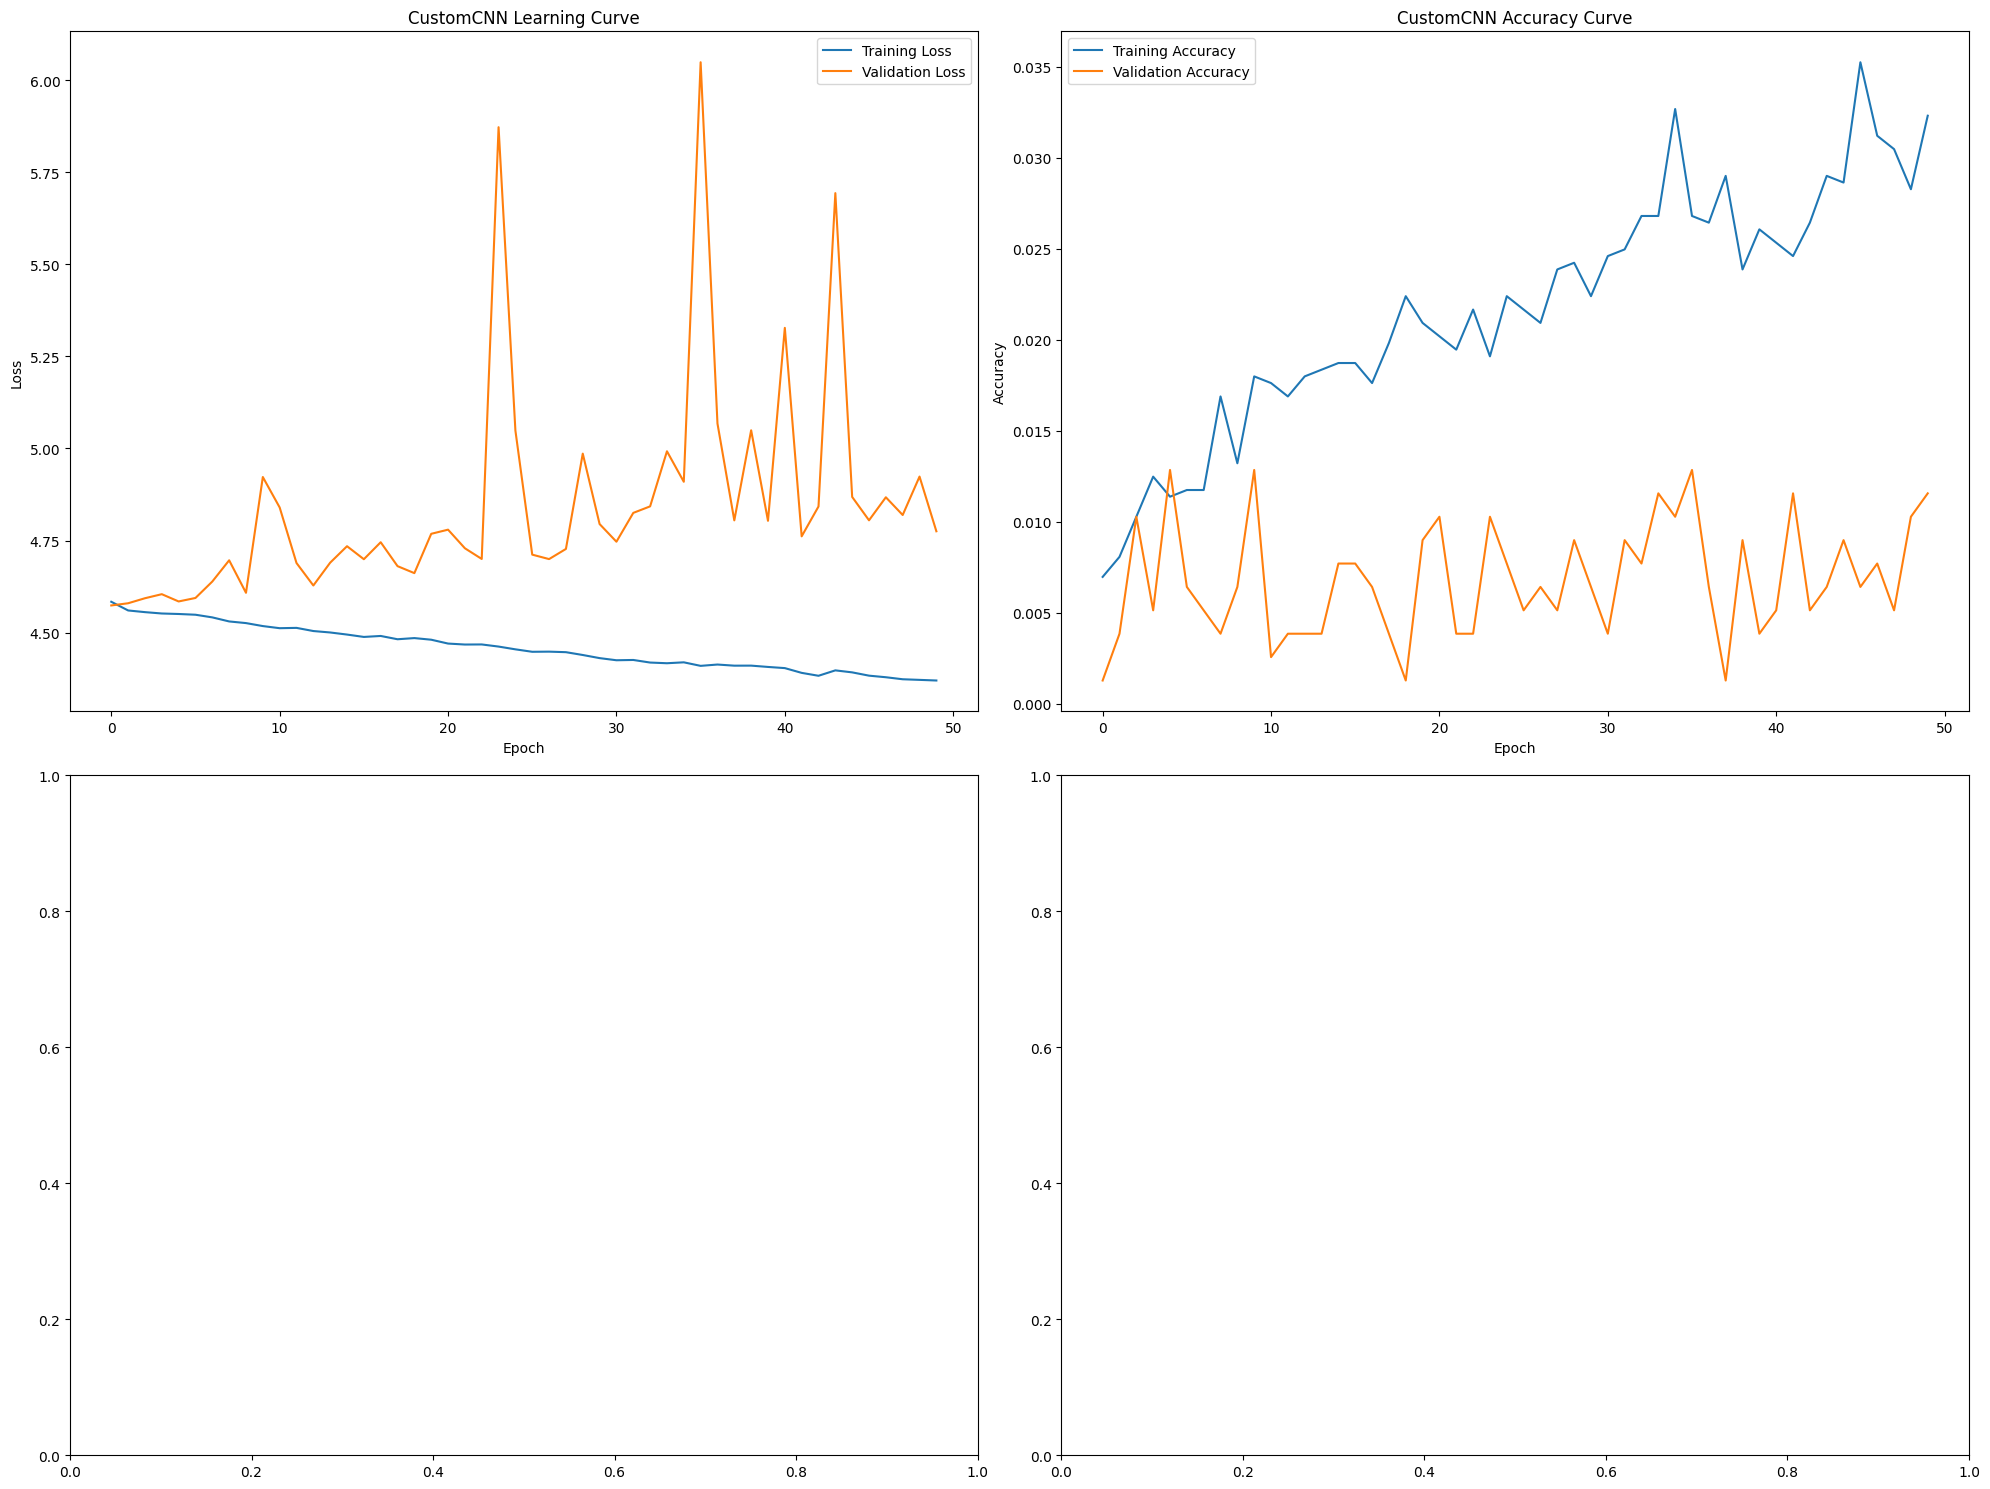

In [7]:
# 绘制学习曲线
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs[0, 0].plot(history['loss'], label='Training Loss')
axs[0, 0].plot(history['val_loss'], label='Validation Loss')
axs[0, 0].set_title('CustomCNN Learning Curve')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

axs[0, 1].plot(history['accuracy'], label='Training Accuracy')
axs[0, 1].plot(history['val_accuracy'], label='Validation Accuracy')
axs[0, 1].set_title('CustomCNN Accuracy Curve')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

plt.tight_layout()
plt.show()